# Proyek Analisis Data: Air Quality Dataset
- Nama: Fadhil Erdya Qashmal
- fadhileq28@gmail.com || m268b4ky1315@bangkit.academy
- Fadhil Erdya Qashmal

#### Catatan Pada Proyek ini berupa Sedikit markdown di akhir proses atau komentar pada program

## Menentukan Pertanyaan bisnis
- Untuk rata rata tingkat polusi per bulannya Ketika suatu polutan di satu daerah naik bagaimana tren polusi pada dustrik lainnya yang berdekatan?¶
- Bagaimana Keadaan distrik yang berdekatan ketika satu distrik mencapai jam dengan rerata tertinggi suatu polusi ?
- Bagaimana perbandingan rerata suhu antara dua distrik dari tahun ke tahun?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import folium
import geopandas as gpd
import ipywidgets as widgets
from IPython.display import display

Import Module yang diperlukan

## Data Wrangling

### Gathering Data

In [2]:
tiantan_df = pd.read_csv("AirData/Tiantan.csv")
dongsi_df = pd.read_csv("AirData/Dongsi.csv")

tiantan_df['date'] = pd.to_datetime(tiantan_df[['year', 'month', 'day', 'hour']])
dongsi_df['date'] = pd.to_datetime(dongsi_df[['year', 'month', 'day', 'hour']])

membaca dataset dan manambah variabel date untuk kedua dataset

In [3]:
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00


In [4]:
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,2013-03-01 04:00:00


#### Insight
Pada analisis kali ini saya menggunakan data dari dua distrik yaitu tiantan dan dongsi karena beberapa alasan seperti:
1. Tiantan dan Dongsi merupakan dua distrik yang saling berdekatan di pusat kota Beijing, sehingga memungkinkan untuk melakukan perbandingan kualitas udara yang lebih relevan karena faktor geografis yang hampir sama.
2. Karena letaknya yang berdekatan, saya ingin menganalisis apakah mungkin terdapat kemiripan data.

### Assesing Data 

In [5]:
#Cek Info dataset dan nilai kosong di dataset tiantan
tiantan_df.info()
tiantan_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   year     35064 non-null  int64         
 2   month    35064 non-null  int64         
 3   day      35064 non-null  int64         
 4   hour     35064 non-null  int64         
 5   PM2.5    34387 non-null  float64       
 6   PM10     34467 non-null  float64       
 7   SO2      33946 non-null  float64       
 8   NO2      34320 non-null  float64       
 9   CO       33938 non-null  float64       
 10  O3       34221 non-null  float64       
 11  TEMP     35044 non-null  float64       
 12  PRES     35044 non-null  float64       
 13  DEWP     35044 non-null  float64       
 14  RAIN     35044 non-null  float64       
 15  wd       34986 non-null  object        
 16  WSPM     35050 non-null  float64       
 17  station  35064 non-null  object

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
date          0
dtype: int64

Mencari tau kolom bernilai pada dataset tiantan

In [6]:
#Cek Info dataset dan nilai kosong di dataset dongsi
dongsi_df.info()
dongsi_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   year     35064 non-null  int64         
 2   month    35064 non-null  int64         
 3   day      35064 non-null  int64         
 4   hour     35064 non-null  int64         
 5   PM2.5    34314 non-null  float64       
 6   PM10     34511 non-null  float64       
 7   SO2      34401 non-null  float64       
 8   NO2      33463 non-null  float64       
 9   CO       31867 non-null  float64       
 10  O3       34400 non-null  float64       
 11  TEMP     35044 non-null  float64       
 12  PRES     35044 non-null  float64       
 13  DEWP     35044 non-null  float64       
 14  RAIN     35044 non-null  float64       
 15  wd       34986 non-null  object        
 16  WSPM     35050 non-null  float64       
 17  station  35064 non-null  object

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
date          0
dtype: int64

Mencari tau kolom bernilai pada dataset dongsi

In [7]:
#cek duplikasi di dataset tiantan dan dongsi
print("Jumlah duplikasi Tiantan: ", tiantan_df.duplicated().sum())
print("Jumlah duplikasi Dongsi: ", dongsi_df.duplicated().sum())

Jumlah duplikasi Tiantan:  0
Jumlah duplikasi Dongsi:  0


Mencari tahu data yang duplikat pada kedua dataset

In [8]:
# cek Outlier di dataset tiantan
tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785,2015-03-01 11:30:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000,2017-02-28 23:00:00
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368,NaN


In [9]:
# cek Outlier di dataset dongsi
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785,2015-03-01 11:30:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000,2017-02-28 23:00:00
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368,NaN


#### Insight
Dari mengevaluasi data data tersebut dapat didapatkan info sebagai berikut
1. kedua dataset memiliki banyak nilai kosong di beberapa variabel 
2. Pada kedua data terdapat beberapa kemungkinan outlier di beberapa variabel diantaranya PM2.5, PM10, CO, dan O3 yang nilai maks nya dapat dianggap terlalu tinggi.
3. kedua dataset tidak terdapat nilai yang duplikat

### Cleaning Data

In [10]:
#Mengisi kekosongan variabel continu dengan method interpolate
#untuk variabel wd isi dengan unknown

tiantan_df[['TEMP', 'PRES', 'DEWP']] = tiantan_df[['TEMP', 'PRES', 'DEWP']].interpolate()
tiantan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']] = tiantan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']].interpolate()
tiantan_df.fillna(value="unknown", inplace=True)

# Cek Nilai null
print(tiantan_df.isna().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64


In [11]:
#Mengisi kekosongan variabel continu dengan method interpolate
#untuk variabel wd isi dengan unknown

dongsi_df[['TEMP', 'PRES', 'DEWP']] = dongsi_df[['TEMP', 'PRES', 'DEWP']].interpolate()
dongsi_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']] = dongsi_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']].interpolate()
dongsi_df.fillna(value="unknown", inplace=True)

# Check for any remaining null values
print(dongsi_df.isna().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64


In [12]:
# Daftar kolom yang ingin dianalisis untuk nilai maksimum
columns_to_analyze = ['PM2.5', 'PM10', 'CO', 'O3']

# Loop untuk menemukan nilai maksimum dan menampilkan data sekitar
for col in columns_to_analyze:
    max_value = tiantan_df[col].max()  # Nilai maksimum
    max_index = tiantan_df[col].idxmax()  # Indeks di mana nilai maksimum berada

    # Menampilkan informasi nilai maksimum
    print(f"Maximum value for {col}: {max_value} at index {max_index}")
    
    # Menampilkan data di sekitar nilai maksimum (misal: 2 baris sebelum dan 2 baris setelah)
    print(f"Data around the maximum value for {col}:")
    print(tiantan_df.loc[max_index-2:max_index+2])  # Menampilkan data sekitar nilai maksimum



Maximum value for PM2.5: 821.0 at index 25779
Data around the maximum value for PM2.5:
          No  year  month  day  hour  PM2.5   PM10    SO2   NO2      CO   O3  \
25777  25778  2016      2    8     1  296.0  464.0  139.0  81.0  1500.0  2.0   
25778  25779  2016      2    8     2  508.0  665.0  136.0  88.0  1800.0  3.0   
25779  25780  2016      2    8     3  821.0  988.0  182.0  88.0  1900.0  3.0   
25780  25781  2016      2    8     4  801.0  927.0  136.0  83.0  2200.0  3.0   
25781  25782  2016      2    8     5  758.0  870.0  126.0  85.0  2800.0  3.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station                date  
25777  -1.7  1010.5 -15.2   0.0  WSW   1.5  Tiantan 2016-02-08 01:00:00  
25778  -1.6  1009.9 -15.1   0.0   SW   1.1  Tiantan 2016-02-08 02:00:00  
25779  -2.6  1008.8 -14.4   0.0    W   0.6  Tiantan 2016-02-08 03:00:00  
25780  -2.5  1008.6 -14.6   0.0  ENE   1.1  Tiantan 2016-02-08 04:00:00  
25781  -3.0  1008.2 -14.4   0.0   NE   0.7  Tiantan 2016-02-08

Pada Dataset Tiantan terdapat fluktuasi polusi yang terlihat normal untuk variabel 2.5PM 10PM dan O3 karena naik dan turun secara berkala sedangkan pada CO terdapat fluktuasi naik dan turun yang tajam sehingga perlu investigasi lebih lanjut

In [13]:
max_value = tiantan_df['CO'].max()  # Nilai maksimum
max_index = tiantan_df['CO'].idxmax()  # Indeks di mana nilai maksimum berada

# Menampilkan informasi nilai maksimum
print(f"Maximum value for {'CO'}: {max_value} at index {max_index}")
    
# Menampilkan data di sekitar nilai maksimum (misal: 2 baris sebelum dan 2 baris setelah)
print(f"Data around the maximum value for {'CO'}:")
print(tiantan_df.loc[max_index-4:max_index+4])  # Menampilkan data sekitar nilai maksimum

Maximum value for CO: 10000.0 at index 19834
Data around the maximum value for CO:
          No  year  month  day  hour  PM2.5  PM10  SO2   NO2       CO     O3  \
19830  19831  2015      6    5     6   42.0  42.0  2.0  25.0   7000.0    7.0   
19831  19832  2015      6    5     7   45.0  45.0  2.0  51.0   8000.0   18.0   
19832  19833  2015      6    5     8   45.0  45.0  3.0  80.0   9000.0   28.0   
19833  19834  2015      6    5     9   48.0  52.0  4.0  82.0    800.0   38.0   
19834  19835  2015      6    5    10   80.0  86.0  4.0  94.0  10000.0   49.0   
19835  19836  2015      6    5    11   64.0  78.0  5.0  76.0   8000.0   82.0   
19836  19837  2015      6    5    12   58.0  58.0  5.0  47.0   6000.0  136.0   
19837  19838  2015      6    5    13   32.0  32.0  5.0  21.0    400.0  165.0   
19838  19839  2015      6    5    14   38.0  42.0  6.0  21.0    400.0  181.0   

       TEMP   PRES  DEWP  RAIN   wd  WSPM  station                date  
19830  17.2  994.7  15.2   0.0    E   1.0  

Investigasi lebih lanjut dan menyatakan jika kolom CO memiliki Outlier karena naik turun yang sangat tajam

In [14]:

Q1 = tiantan_df['CO'].quantile(0.25)
Q3 = tiantan_df['CO'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outlier_mask = (tiantan_df['CO'] < lower_bound) | (tiantan_df['CO'] > upper_bound)


tiantan_df['CO'] = tiantan_df['CO'].mask(outlier_mask)  
tiantan_df['CO'] = tiantan_df['CO'].interpolate()    

tiantan_df.describe()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.033097,106.537076,14.510018,53.258828,1172.339520,56.148077,13.668250,1012.551871,2.445126,0.063983,1.860815,2015-03-01 11:30:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,3200.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000,2017-02-28 23:00:00
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.895489,90.277762,20.277493,32.016282,797.884552,59.458361,11.459735,10.266471,13.811939,0.786059,1.280427,NaN


Menghapus Outlier dengan metode Imputation

In [15]:
# Analisis Dataset Dongsi
# Daftar kolom yang ingin dianalisis untuk nilai maksimum
columns_to_analyze = ['PM2.5', 'PM10', 'CO', 'O3']

# Loop untuk menemukan nilai maksimum dan menampilkan data sekitar
for col in columns_to_analyze:
    max_value = dongsi_df[col].max()  # Nilai maksimum
    max_index = dongsi_df[col].idxmax()  # Indeks di mana nilai maksimum berada

    # Menampilkan informasi nilai maksimum
    print(f"Maximum value for {col}: {max_value} at index {max_index}")
    
    # Menampilkan data di sekitar nilai maksimum (misal: 2 baris sebelum dan 2 baris setelah)
    print(f"Data around the maximum value for {col}:")
    print(dongsi_df.loc[max_index-2:max_index+2])  # Menampilkan data sekitar nilai maksimum



Maximum value for PM2.5: 737.0 at index 8423
Data around the maximum value for PM2.5:
        No  year  month  day  hour  PM2.5   PM10    SO2         NO2      CO  \
8421  8422  2014      2   14    21  504.0  563.0  169.0  103.099889  3700.0   
8422  8423  2014      2   14    22  684.0  760.0  230.0  103.258602  4500.0   
8423  8424  2014      2   14    23  737.0  734.0  200.0  103.417314  4800.0   
8424  8425  2014      2   15     0  679.0  726.0  173.0  103.576027  4800.0   
8425  8426  2014      2   15     1  560.0  565.0  151.0  103.734739  4600.0   

        O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station                date  
8421  49.0  -3.4  1020.5  -6.4   0.0   NE   1.2  Dongsi 2014-02-14 21:00:00  
8422  59.0  -4.2  1020.6  -7.0   0.0    E   0.7  Dongsi 2014-02-14 22:00:00  
8423  59.0  -4.5  1020.5  -6.8   0.0   NE   0.8  Dongsi 2014-02-14 23:00:00  
8424  57.0  -3.9  1020.2  -6.5   0.0   NE   1.1  Dongsi 2014-02-15 00:00:00  
8425  47.0  -4.7  1020.0  -7.0   0.0  ESE   1.0  

Sama seperti dataset Tiantan, pada dataset Dongsi juga terdapat fluktuasi polusi yang terlihat normal untuk variabel 2.5PM 10PM karena naik dan turun secara berkala sedangkan pada CO dan O3 terdapat fluktuasi naik dan turun yang tajam sehingga perlu investigasi lebih lanjut

In [16]:
# Analisis Dataset Dongsi
# Daftar kolom yang ingin dianalisis untuk nilai maksimum
columns_to_analyze = ['CO', 'O3']

# Loop untuk menemukan nilai maksimum dan menampilkan data sekitar
for col in columns_to_analyze:
    max_value = dongsi_df[col].max()  # Nilai maksimum
    max_index = dongsi_df[col].idxmax()  # Indeks di mana nilai maksimum berada

    # Menampilkan informasi nilai maksimum
    print(f"Maximum value for {col}: {max_value} at index {max_index}")
    
    print(f"Data around the maximum value for {col}:")
    print(dongsi_df.loc[max_index-4:max_index+4])  

Maximum value for CO: 10000.0 at index 19815
Data around the maximum value for CO:
          No  year  month  day  hour  PM2.5  PM10   SO2   NO2       CO    O3  \
19811  19812  2015      6    4    11   44.0  59.0  10.0  61.0    800.0  72.0   
19812  19813  2015      6    4    12   57.0  71.0   9.0  62.0    900.0  59.0   
19813  19814  2015      6    4    13   61.0  61.0   8.0  37.0    900.0  79.0   
19814  19815  2015      6    4    14   53.0  53.0   5.0  33.0    900.0  78.0   
19815  19816  2015      6    4    15   40.0  40.0   4.0  32.0  10000.0  74.0   
19816  19817  2015      6    4    16   50.0  50.0   3.0  35.0   1100.0  69.0   
19817  19818  2015      6    4    17   72.0  72.0  12.0  31.0   1100.0  79.0   
19818  19819  2015      6    4    18   75.0  75.0  10.0  34.0   1100.0  86.0   
19819  19820  2015      6    4    19   70.0  70.0  11.0  42.0   1200.0  80.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station                date  
19811  20.6  1001.5  13.3   0.3  SSW   2.1 

Berbeda dengan dataset tiangtan, variabel O3 pada dataset dongsi juga menunjukkan fluktuasi yang tidak normal sehingga perlu disesuaikan lagi outliernya

In [17]:
columns_to_process = ['CO', 'O3']

for col in columns_to_process:
    Q1 = dongsi_df[col].quantile(0.25)
    Q3 = dongsi_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (dongsi_df[col] < lower_bound) | (dongsi_df[col] > upper_bound)
    dongsi_df[col] = dongsi_df[col].mask(outlier_mask)
    dongsi_df[col] = dongsi_df[col].interpolate()
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.144243,110.347617,18.506142,53.953078,1209.211920,55.261136,13.668250,1012.551871,2.445126,0.063983,1.860815,2015-03-01 11:30:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,150.000000,24.000000,74.000000,1600.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,3333.333333,185.034483,41.100000,1042.000000,28.800000,46.400000,10.500000,2017-02-28 23:00:00
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.260246,98.239918,22.954756,34.213245,807.915811,48.735212,11.459735,10.266471,13.811939,0.786059,1.280427,NaN


Menghapus Oulier pada variabel O3 dan CO milik dataset Dongsi

#### Insight
1. Membersihkan data yang memiliki missing value dengan metode interpolasi untuk kedua dataset karena perlu banyak pertimbangan untuk drop dan juga kurangnya background knowledge
2. Untuk membersihkan outlier dilakukan dengan membandingkan pada jam jam sbelum dan setelahnya jika masih naik turun secara berkala maka dianggap sebagai faktor external tetapi jika naik turun secara tajam maka kemungkinan akibat galat dari manusia atau sistem sehingga perlu dibersihkan
3. Pada dataset 1 tiangtan variabel CO memiliki outlier dan dibersihkan dengan metode interpolation masking
4. Pada dataset 2 dongsi variabel CO dan O3 memiliki outlier dan dibersihkan dengan metode interpolation masking juga

## Exploratory Data Analysis

### Exploring Data Gabungan antara dataset taiantan dan dongsi

In [18]:
# Menggabungkan data berdasarkan waktu
combined = pd.merge(tiantan_df, dongsi_df, on=['year', 'month', 'day', 'hour'], suffixes=('_tiangtan', '_dongsi'))

# Yang termasuk polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
combined.describe()

,No_tiangtan,year,month,day,hour,PM2.5_tiangtan,PM10_tiangtan,SO2_tiangtan,NO2_tiangtan,CO_tiangtan,...,SO2_dongsi,NO2_dongsi,CO_dongsi,O3_dongsi,TEMP_dongsi,PRES_dongsi,DEWP_dongsi,RAIN_dongsi,WSPM_dongsi,date_dongsi
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,...,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.033097,106.537076,14.510018,53.258828,1172.339520,...,18.506142,53.953078,1209.211920,55.261136,13.668250,1012.551871,2.445126,0.063983,1.860815,2015-03-01 11:30:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,...,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,...,3.712800,27.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,85.000000,7.000000,47.000000,900.000000,...,10.000000,47.000000,1000.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,...,24.000000,74.000000,1600.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,3200.000000,...,300.000000,258.000000,3333.333333,185.034483,41.100000,1042.000000,28.800000,46.400000,10.500000,2017-02-28 23:00:00
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.895489,90.277762,20.277493,32.016282,797.884552,...,22.954756,34.213245,807.915811,48.735212,11.459735,10.266471,13.811939,0.786059,1.280427,NaN


### Menghitung korelasi Pearson untuk setiap polutan antara Tiangtan dan Dongsi Guna mengetahui korelasi tingkat polusi antara satu distrik dengan distrik lainnya

In [19]:
# Membuat pivot table berisi tingkat rerata polutan per bulannya di kedua distrik
# Menghitung rata-rata polusi per bulan untuk masing-masing distrik
monthly_avg_tiangtan = combined.groupby(['year', 'month'])[[f'{pollutant}_tiangtan' for pollutant in pollutants]].mean()
monthly_avg_dongsi = combined.groupby(['year', 'month'])[[f'{pollutant}_dongsi' for pollutant in pollutants]].mean()


# Menggabungkan rata-rata bulanan dari kedua distrik menggunakan merge
monthly_avg = pd.merge(monthly_avg_tiangtan.reset_index(), 
                       monthly_avg_dongsi.reset_index(), 
                       on=['year', 'month'], 
                       suffixes=('_tiangtan', '_dongsi'))

# Menampilkan beberapa baris pertama
monthly_avg.head()

,year,month,PM2.5_tiangtan,PM10_tiangtan,SO2_tiangtan,NO2_tiangtan,CO_tiangtan,O3_tiangtan,PM2.5_dongsi,PM10_dongsi,SO2_dongsi,NO2_dongsi,CO_dongsi,O3_dongsi
0,2013,3,105.959005,123.262097,37.740913,63.998877,1441.178091,62.243122,108.413978,131.579301,39.964802,76.900986,1457.549059,58.998079
1,2013,4,60.973611,90.941667,21.311171,43.576272,972.075000,67.772154,65.280556,98.572222,22.365898,43.794807,957.688194,69.428670
2,2013,5,80.413306,138.120968,26.999328,42.235887,1101.634745,81.631480,91.392473,131.985215,31.587366,52.174731,1160.418347,90.849346
3,2013,6,110.459028,133.757639,15.270931,48.787583,1425.124306,74.782803,109.452778,115.711111,20.788429,56.007834,1177.273811,78.663183
4,2013,7,69.298387,84.125000,6.993545,43.413498,1062.881720,77.721035,72.967742,79.990591,8.814829,47.386772,955.368906,79.179290


Membuat pivot table yang berisi rerata polutan tiap bulan di kedua distrik

In [20]:
# Menghitung korelasi antara Tiangtan dan Dongsi untuk setiap polutan
correlations = {}
for pollutant in pollutants:
    correlation = monthly_avg[f'{pollutant}_tiangtan'].corr(monthly_avg[f'{pollutant}_dongsi'])
    correlations[pollutant] = correlation

# Menampilkan hasil korelasit
for pollutant, corr in correlations.items():
    print(f'Korelasi antara Tiangtan dan Dongsi untuk {pollutant}: {corr:.2f}')

Korelasi antara Tiangtan dan Dongsi untuk PM2.5: 0.98
Korelasi antara Tiangtan dan Dongsi untuk PM10: 0.95
Korelasi antara Tiangtan dan Dongsi untuk SO2: 0.97
Korelasi antara Tiangtan dan Dongsi untuk NO2: 0.86
Korelasi antara Tiangtan dan Dongsi untuk CO: 0.92
Korelasi antara Tiangtan dan Dongsi untuk O3: 0.98


Menggunakan Korelasi Pearson untuk menghitung korelasi antar rerata pollutan tiap bulannya di kedua distrik. Hasil dari korelasi pearson yang mendekati nilai 1 menyatakan jika kedua tabel tingkat rerata polutan bulanan memiliki keterkaitan yang cukup erat

### Mencari tahu jam-jam suatu polutan mencapai rerata tertinggi dan bandingkan antar 2 distrik

In [21]:
# Membuat pivot table untuk mendapatkan nilai maksimum per jam untuk setiap polutan di masing-masing distrik
pivot_tables_tiangtan = {}
pivot_tables_dongsi = {}

for pollutant in pollutants:
    # Pivot table untuk Tiangtan
    pivot_table_tiangtan = combined.pivot_table(values=pollutant + '_tiangtan', 
                                                index='hour', 
                                                aggfunc='mean')
    pivot_tables_tiangtan[pollutant] = pivot_table_tiangtan
    
    # Pivot table untuk Dongsi
    pivot_table_dongsi = combined.pivot_table(values=pollutant + '_dongsi', 
                                              index='hour', 
                                              aggfunc='mean')
    pivot_tables_dongsi[pollutant] = pivot_table_dongsi

Membuat Pivot table yang berisi rerata tingkat pollutan di tiap jamnya untuk kedua distrik

In [22]:
# Menganalisis kapan Polutan mencapai titik tertinggi di Tiangtan dan Dongsi
for pollutant in pollutants:
    # Tiangtan
    max_tiangtan_hour = pivot_tables_tiangtan[pollutant].idxmax()
    max_tiangtan_value = pivot_tables_tiangtan[pollutant].max()
    
    # Dongsi
    max_dongsi_hour = pivot_tables_dongsi[pollutant].idxmax()
    max_dongsi_value = pivot_tables_dongsi[pollutant].max()
        
    # Output hasil perbandingan
    print(f"{pollutant} Tertinggi di Tiangtan terjadi pada jam {max_tiangtan_hour} dengan nilai {max_tiangtan_value}")
    print(f"{pollutant} Tertinggi di Dongsi terjadi pada jam {max_dongsi_hour} dengan nilai {max_dongsi_value}")
    print("-" * 50)

PM2.5 Tertinggi di Tiangtan terjadi pada jam PM2.5_tiangtan    0
dtype: int64 dengan nilai PM2.5_tiangtan    88.932751
dtype: float64
PM2.5 Tertinggi di Dongsi terjadi pada jam PM2.5_dongsi    22
dtype: int64 dengan nilai PM2.5_dongsi    97.57045
dtype: float64
--------------------------------------------------
PM10 Tertinggi di Tiangtan terjadi pada jam PM10_tiangtan    21
dtype: int64 dengan nilai PM10_tiangtan    118.20535
dtype: float64
PM10 Tertinggi di Dongsi terjadi pada jam PM10_dongsi    21
dtype: int64 dengan nilai PM10_dongsi    130.440054
dtype: float64
--------------------------------------------------
SO2 Tertinggi di Tiangtan terjadi pada jam SO2_tiangtan    12
dtype: int64 dengan nilai SO2_tiangtan    20.385709
dtype: float64
SO2 Tertinggi di Dongsi terjadi pada jam SO2_dongsi    11
dtype: int64 dengan nilai SO2_dongsi    20.636748
dtype: float64
--------------------------------------------------
NO2 Tertinggi di Tiangtan terjadi pada jam NO2_tiangtan    9
dtype: int64 

Mencari Tahu waktu ketika pollutan mencapai rerata tertinggi di kedua distrik

### Mencari Suhu Rerata Tiap Tahunnnya

In [23]:
# Menghitung rata-rata suhu per tahun untuk masing-masing distrik
rerata_tahunan_suhu_tiangtan = combined.groupby('year')['TEMP_tiangtan'].mean()
rerata_tahunan_suhu_dongsi = combined.groupby('year')['TEMP_dongsi'].mean()

# Membuat DataFrame untuk clustered bar chart
perbandingan_suhu_df = pd.DataFrame({
    'Year': rerata_tahunan_suhu_tiangtan.index,
    'Tiangtan': rerata_tahunan_suhu_tiangtan.values,
    'Dongsi': rerata_tahunan_suhu_dongsi.values
})


Membuat pivot table baru berdasarkan rerata suhu kedua distrik tiap tahunnya

In [24]:
perbandingan_suhu_df

,Year,Tiangtan,Dongsi
0,2013,15.963657,15.963657
1,2014,13.881153,13.881153
2,2015,13.428637,13.428637
3,2016,13.871962,13.871962
4,2017,0.664779,0.664779


#### Insight
1. Dalam mengeksplor dataset ini untuk mendapat bagian bagian yang diperlukan untuk menjawab pertanyaan dataset tiangtan dan dongsi digabung menggunakan method merge dan dimasukkan pada dataframe combined lalu dibuat suatu variabel berisi list unsur yang dapat menjadi pollutan untuk memudahkan membuat dtabel atau grafik menyangkut pollutan pollutan tersebut
2. Membuat pivot table untuk menyimpan rerata tiap bulan dengan groupby diikuti variabel bulan dan tahun untuk setiap pollutan dalam list 
3. Mengihtung tingkat korelasi dengan kroelasi pearson karena korelasi pearson sudah sering menjadi bagian untuk mengukur dan menganalisis hubungan linear dan memberikan nilai -1 hingga 1 yang mudah direpresentasikan
4. Membuat Pivot table berisi rerata pollutan tiap jamnya menggunakan groupby hour dan aggfunc mean ntuk menjawab pertanyaan kedua
5. Mencari tahu jam dengan tertinggi dan nilainya, lalu menampilkan data data tersebut
6. Membuat pivot table baru berdasarkan rerata suhu kedua distrik tiap tahunnya untuk dibandingkan dan menjawab pertanyaan no 3


## Visualisasi dan Explanatory Analysis

### Pertanyaan 1: Untuk rata rata tingkat polusi per bulannya Ketika suatu polutan di satu daerah naik apakah polutan di daerah lainnya ikut naik juga ?

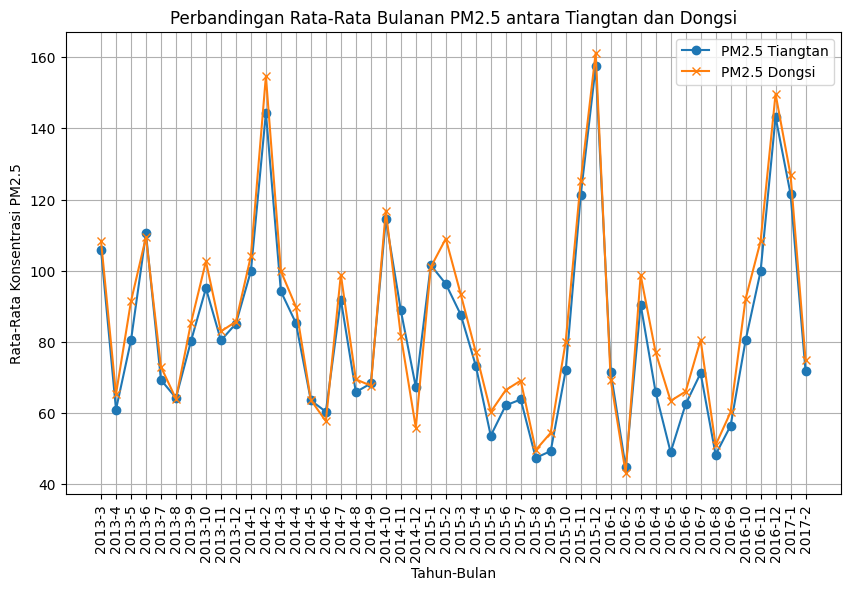

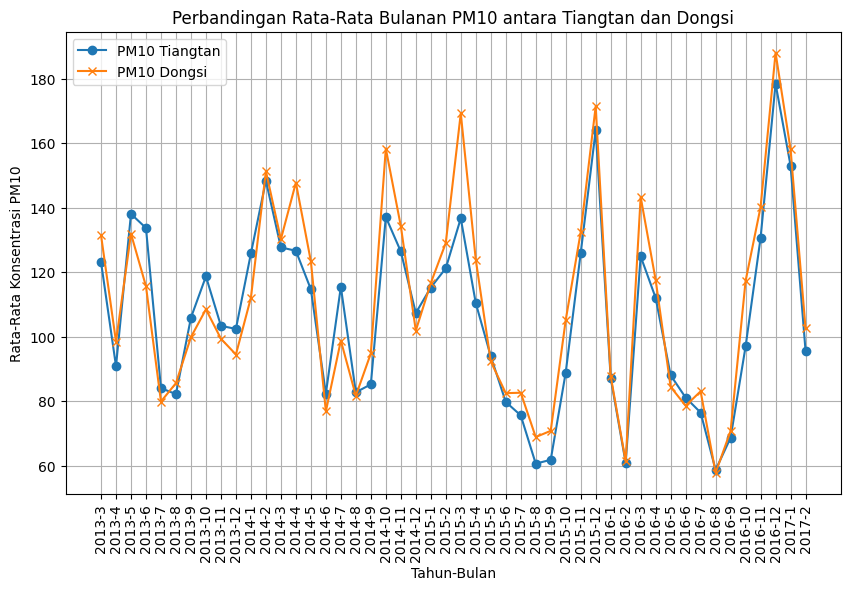

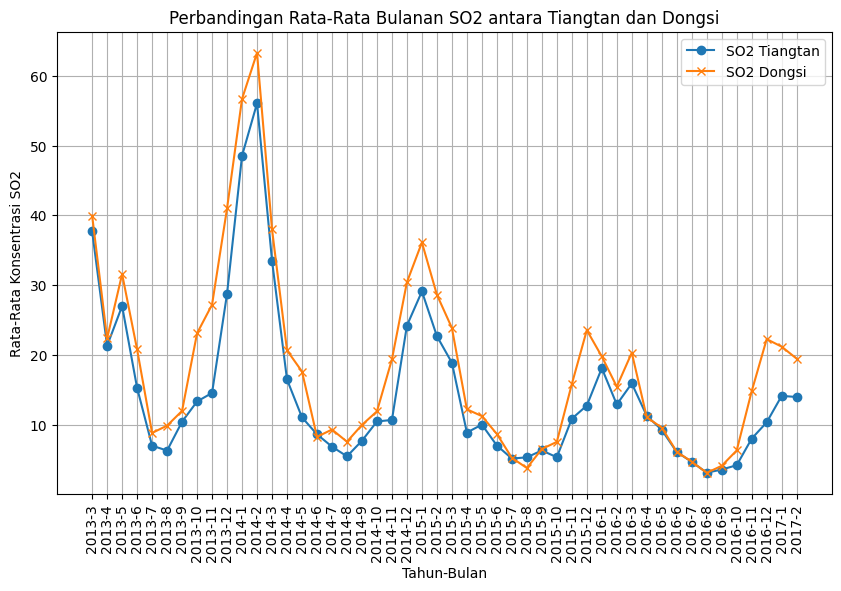

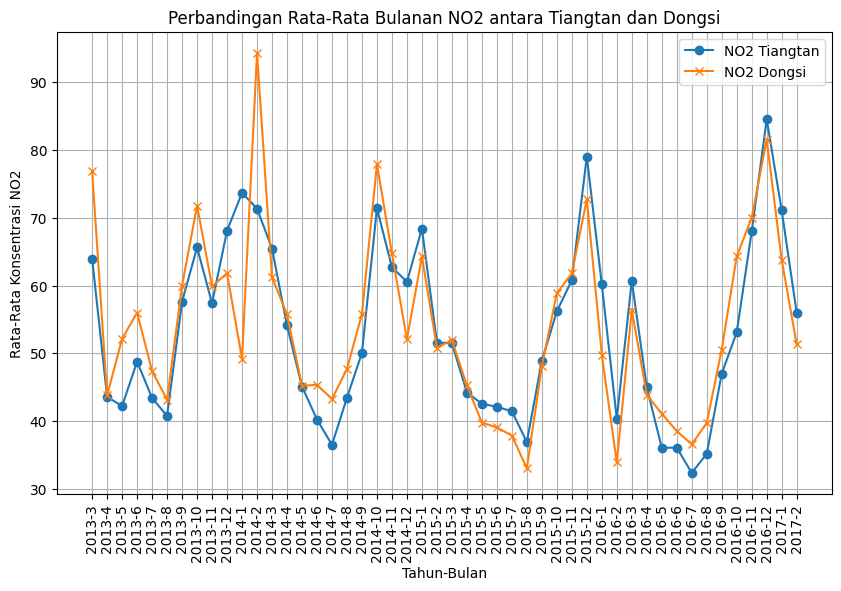

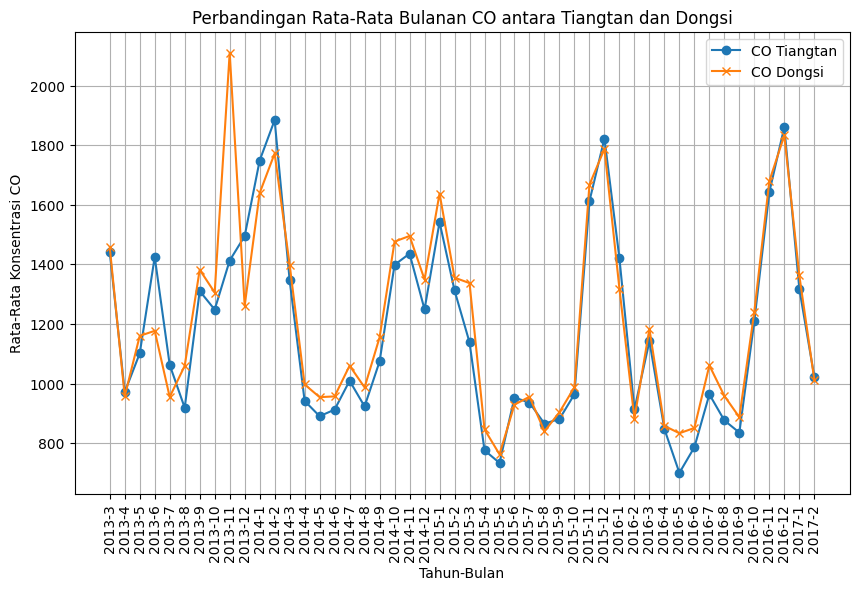

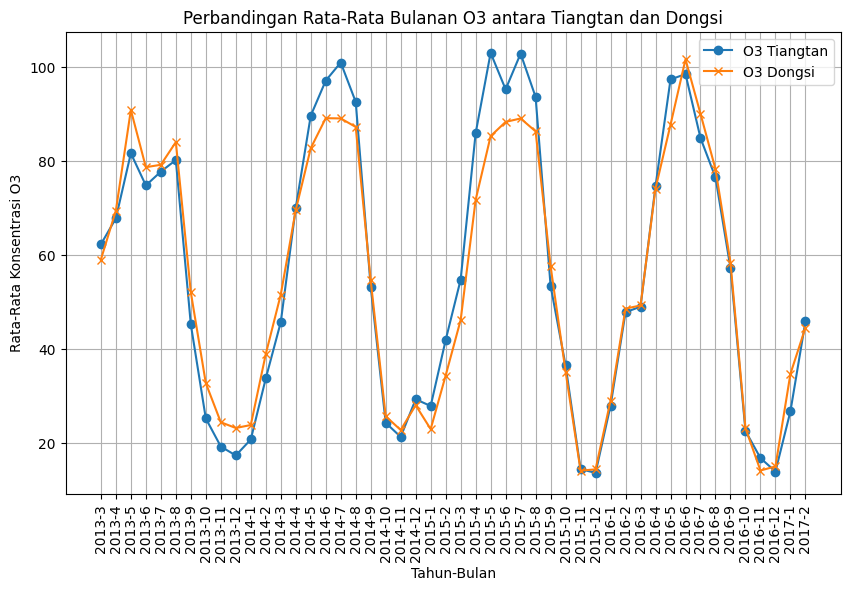

In [25]:

# Tambahkan kolom untuk format "Tahun ke-x Bulan ke-y"
monthly_avg['Tahun_Bulan'] = monthly_avg['year'].astype(str) + "-" + monthly_avg['month'].astype(str)

# Visualisasi perbandingan rata-rata bulanan antara Tiangtan dan Dongsi
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    
    # Plotting rata-rata bulanan Tiangtan
    plt.plot(monthly_avg['Tahun_Bulan'], monthly_avg[f'{pollutant}_tiangtan'], marker='o', label=f'{pollutant} Tiangtan')
    
    # Plotting rata-rata bulanan Dongsi
    plt.plot(monthly_avg['Tahun_Bulan'], monthly_avg[f'{pollutant}_dongsi'], marker='x', label=f'{pollutant} Dongsi')
    
    # Konfigurasi plot
    plt.title(f'Perbandingan Rata-Rata Bulanan {pollutant} antara Tiangtan dan Dongsi')
    plt.xlabel('Tahun-Bulan')
    plt.ylabel(f'Rata-Rata Konsentrasi {pollutant}')
    plt.xticks(rotation=90)  # Memutar label agar lebih mudah dibaca
    plt.legend()
    plt.grid(True)
    plt.show()


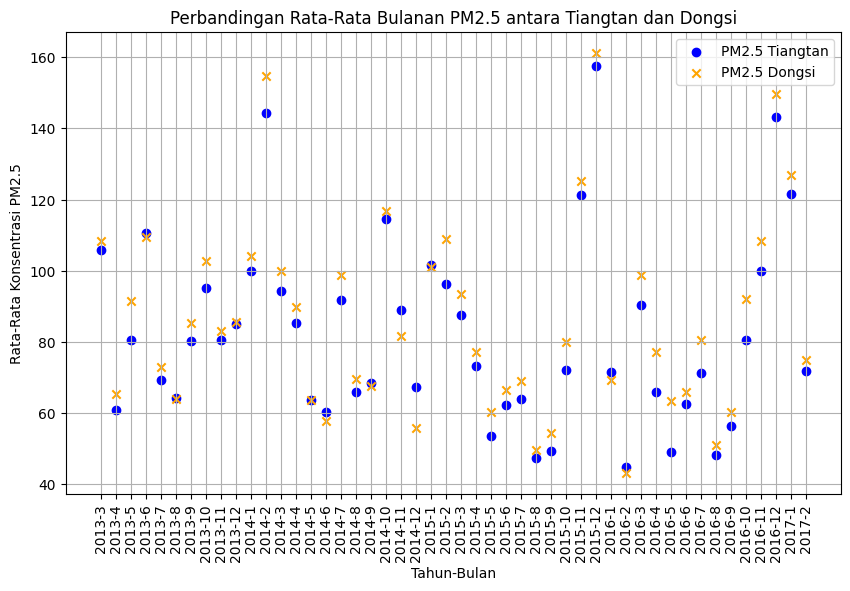

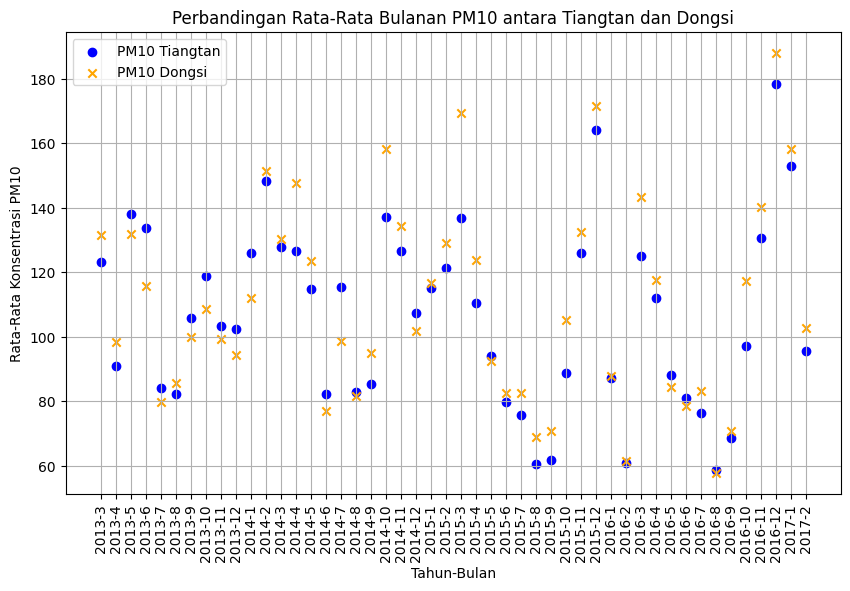

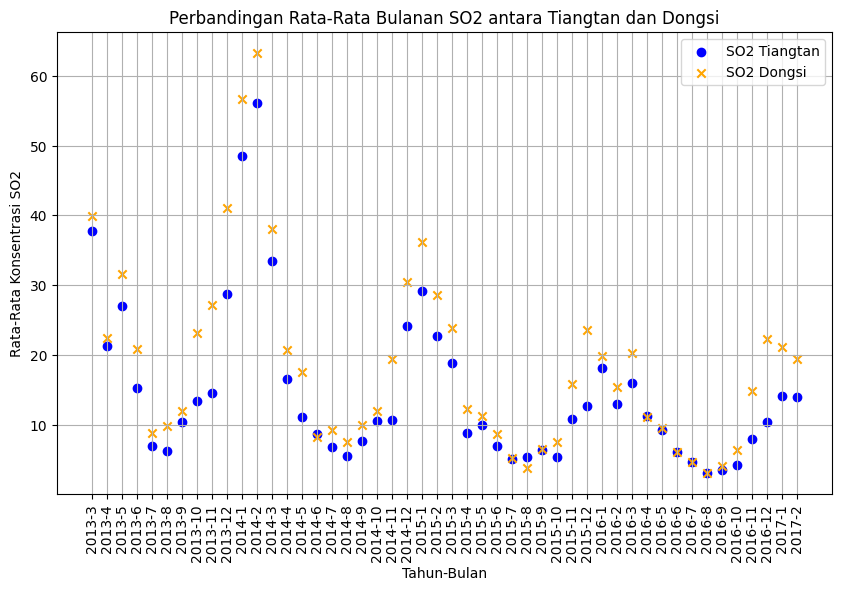

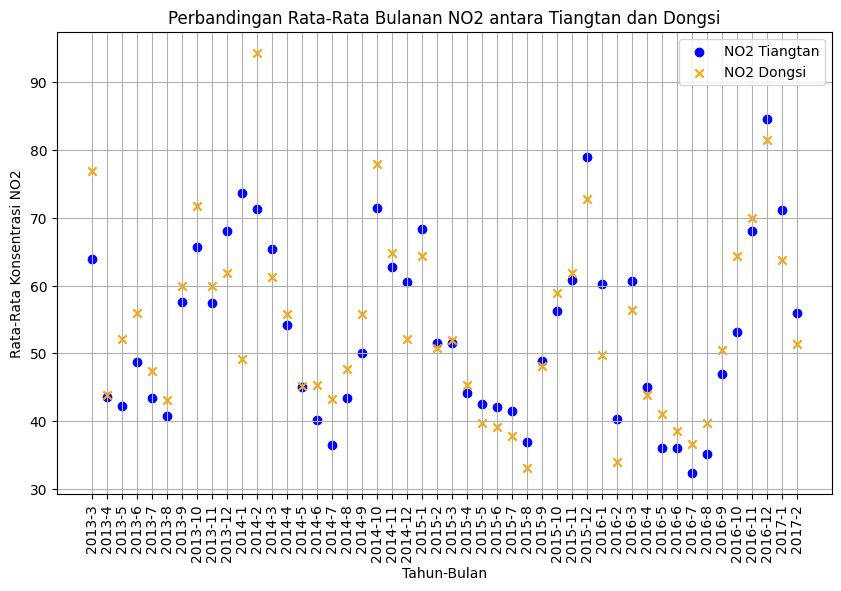

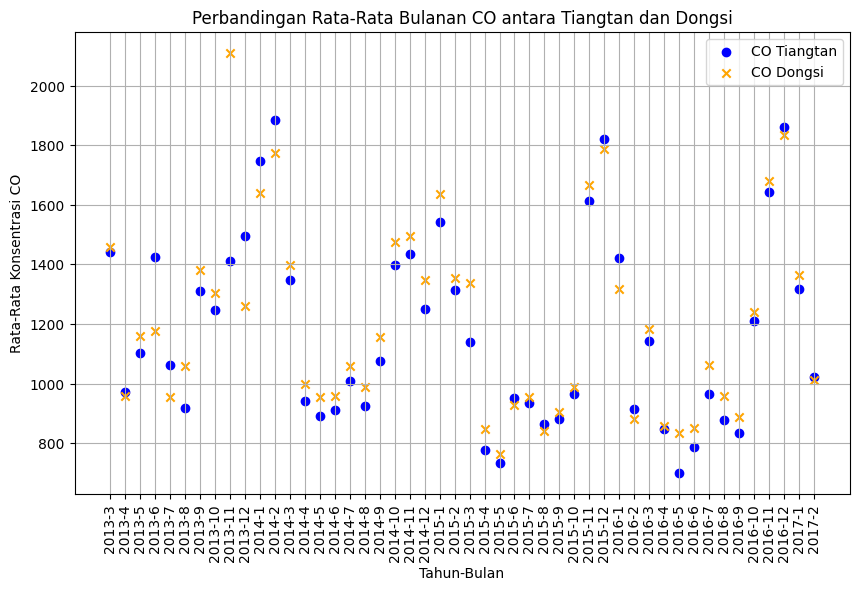

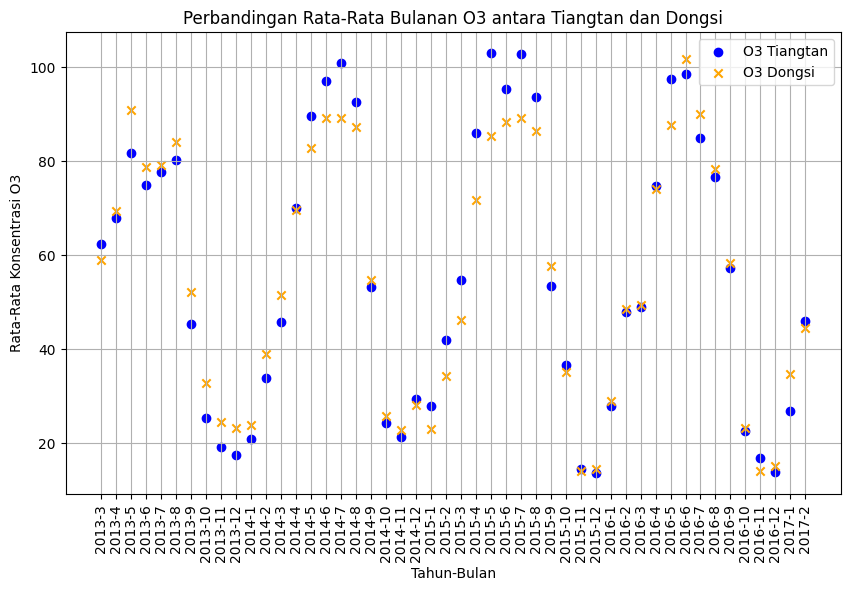

In [26]:
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    
    # Scatter plot untuk Tiangtan
    plt.scatter(monthly_avg['Tahun_Bulan'], monthly_avg[f'{pollutant}_tiangtan'], marker='o', label=f'{pollutant} Tiangtan', color='blue')
    
    # Scatter plot untuk Dongsi
    plt.scatter(monthly_avg['Tahun_Bulan'], monthly_avg[f'{pollutant}_dongsi'], marker='x', label=f'{pollutant} Dongsi', color='orange')
    
    # Konfigurasi plot
    plt.title(f'Perbandingan Rata-Rata Bulanan {pollutant} antara Tiangtan dan Dongsi')
    plt.xlabel('Tahun-Bulan')
    plt.ylabel(f'Rata-Rata Konsentrasi {pollutant}')
    plt.xticks(rotation=90)  # Memutar label agar lebih mudah dibaca
    plt.legend()
    plt.grid(True)
    plt.show()

Membandingkan dan Melihat Tren naik turunnya berbagai pollutan dari bulan ke bulan pada distrik Tiantan dan Dongsi Menggunakan line plot dan scatter plot

### Pertanyaan 2 Bagaimana Keadaan distrik yang berdekatan ketika satu distrik mencapai jam dengan rerata tertinggi suatu polusi.

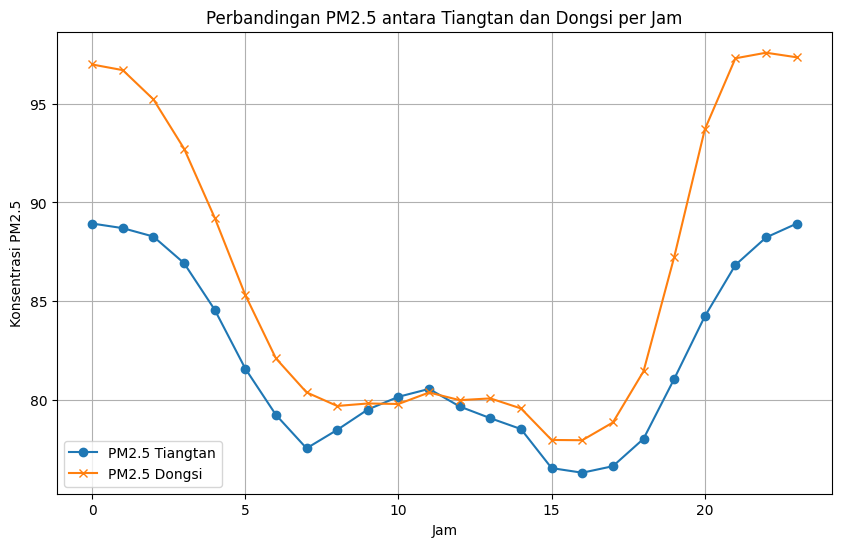

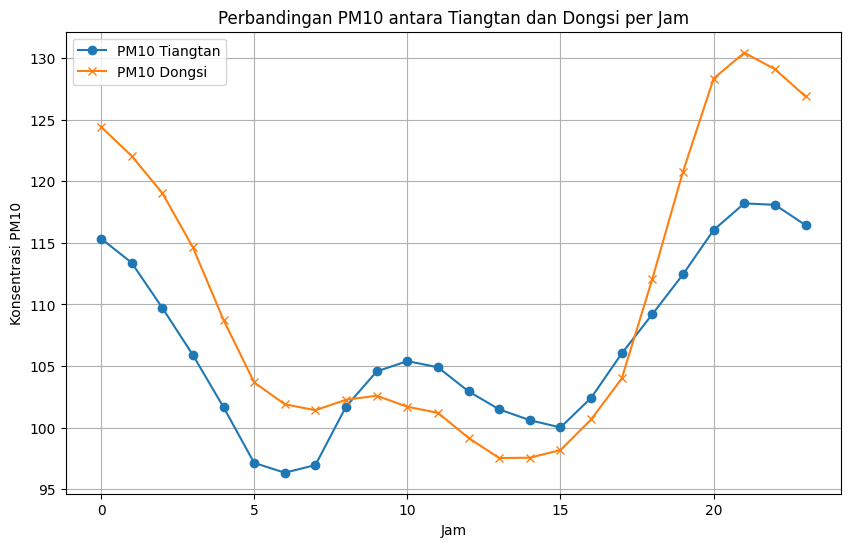

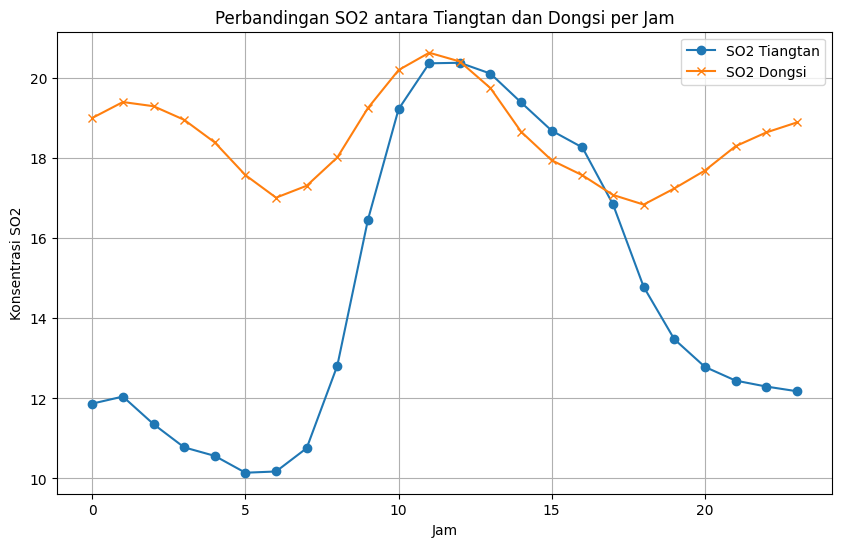

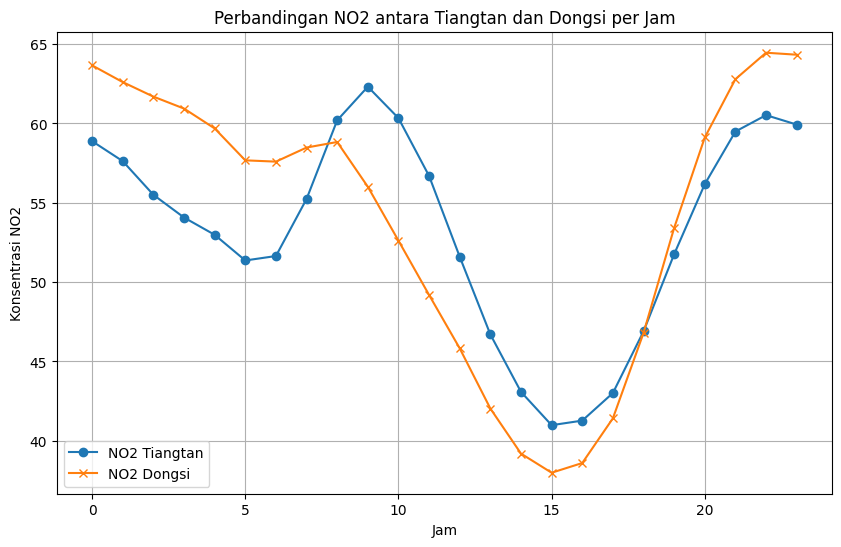

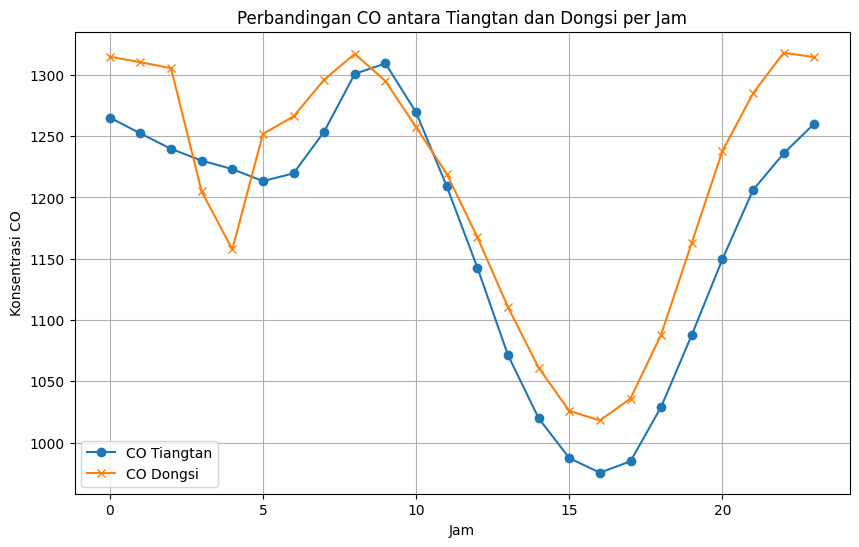

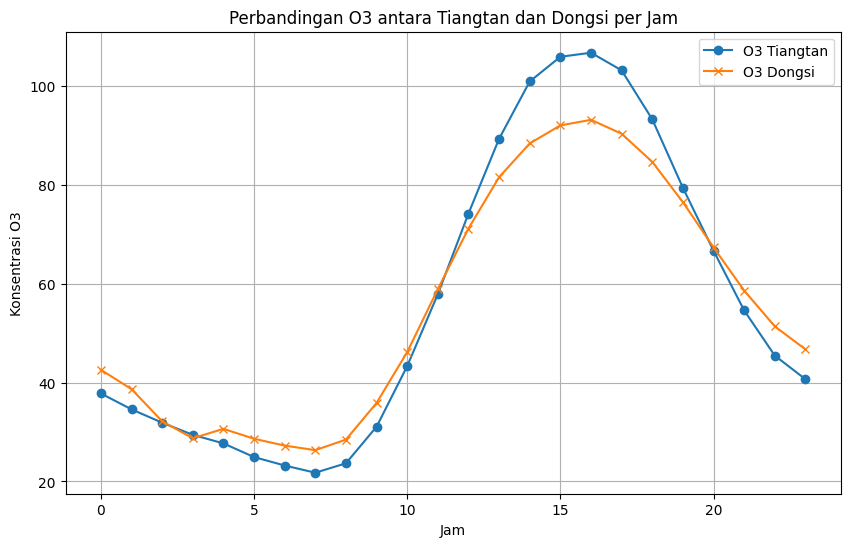

In [27]:
# Visualisasi perbandingan antara Tiangtan dan Dongsi untuk setiap polutan
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    
    # Plotting Tiangtan
    plt.plot(pivot_tables_tiangtan[pollutant], marker='o', label=f'{pollutant} Tiangtan')
    
    # Plotting Dongsi
    plt.plot(pivot_tables_dongsi[pollutant], marker='x', label=f'{pollutant} Dongsi')
    
    # Konfigurasi plot
    plt.title(f'Perbandingan {pollutant} antara Tiangtan dan Dongsi per Jam')
    plt.xlabel('Jam')
    plt.ylabel(f'Konsentrasi {pollutant}')
    plt.legend()
    plt.grid(True)
    plt.show()

Membandingkan rerata tingkat intensitas pollutan tiap jam keseluruhan data distrik Tiantan dan Dongsi menggunakan line plot

### Pertanyaan 3 Bagaimana perbandingan rerata suhu antara dua distrik dari tahun ke tahun?

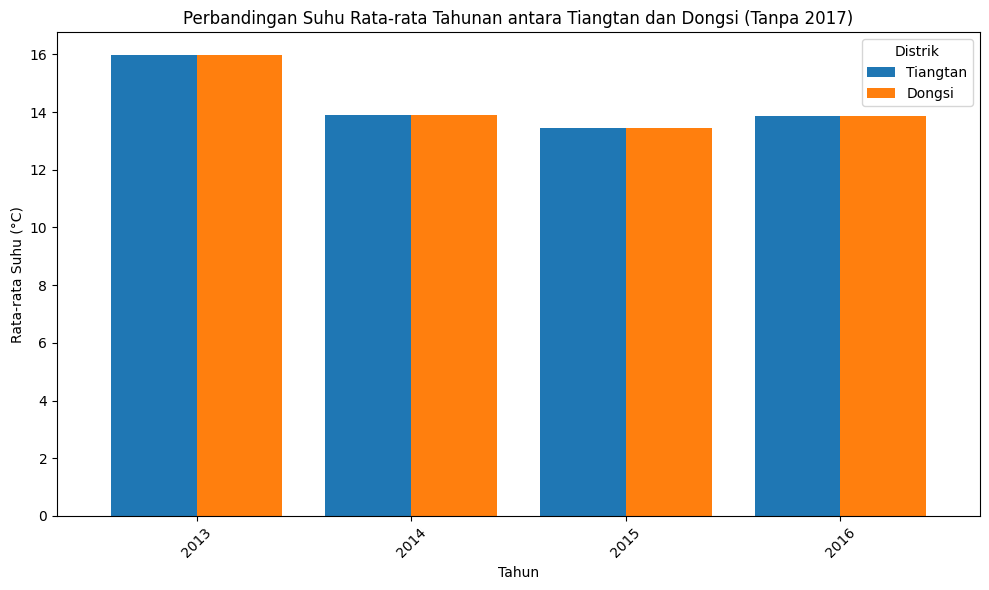

In [28]:
# Filter untuk menghilangkan data pada tahun 2017
perbandingan_suhu_df = perbandingan_suhu_df[perbandingan_suhu_df['Year'] != 2017]

# Plotting clustered bar chart
fig, ax = plt.subplots(figsize=(10, 6))
perbandingan_suhu_df.set_index('Year').plot(kind='bar', ax=ax, width=0.8)

ax.set_title('Perbandingan Suhu Rata-rata Tahunan antara Tiangtan dan Dongsi (Tanpa 2017)')
ax.set_xlabel('Tahun')
ax.set_ylabel('Rata-rata Suhu (°C)')
plt.xticks(rotation=45)
plt.legend(title='Distrik')
plt.tight_layout()
plt.show()

Membandingkan Rerata suhu tiap tahunnya antara dua distrik Tiantan dan Dongsi menggunakan clustered chart

#### Insight
1. Untuk melihat tren persebaran dan fluktuasi menggunakan salah satu dari scatter plot atau line plot seharusnya sudah cukup, tetapi untuk memaksimalkan analisis bisa juga digunakan keduanya. Line plot cocok untuk mencari tahu lonjakan dan tren naik turunnya data sedangkan scatter plot cocok untuk distribusi nilai individu dan memvisualisasikan fluktuasi
2. Untuk melihat tren dan pola umum dari rerata nilai intensitas polutan tiap jamnya di kedua distrik, line plot dapat digunakan pada kasu kasu seperti ini
3. Clustered chart digunakan karena menampilkan dapat memberikan perbandingan langsung anatara dua dataset atau variabel/



## Analisis Lanjutan menggunakan Geo-Spatial Analysis

In [29]:

tiangtan_coords = [39.8737, 116.3975] 
dongsi_coords = [39.9289, 116.4179]  

def get_color(value):
    if value < 5:
        return '#3186cc'  
    elif 5 <= value < 10:
        return '#66b2ff'  
    elif 10 <= value < 12:
        return '#66cc99'  
    elif 12 <= value < 14:
        return '#99cc66'  
    elif 14 <= value < 16:
        return '#cccc66'  
    elif 16 <= value < 18:
        return '#ffcc66'  
    elif 18 <= value < 20:
        return '#ff9966' 
    else:
        return '#cc6666'

# Fungsi untuk membuat peta
def create_map(year):
    data = perbandingan_suhu_df
    avg_temp_tiangtan = perbandingan_suhu_df.loc[perbandingan_suhu_df['Year'] == year, 'Tiangtan'].values[0]
    avg_temp_dongsi = perbandingan_suhu_df.loc[perbandingan_suhu_df['Year'] == year, 'Dongsi'].values[0]
    # Membuat peta menggunakan folium
    m = folium.Map(location=[39.9042, 116.4074], zoom_start=12) 

    # Menambahkan lingkaran untuk Tiangtan berdasarkan suhu rata-rata
    folium.Circle(
        location=tiangtan_coords,
        radius=1000,  
        color='black',
        fill=True,
        fill_color=get_color(avg_temp_tiangtan),
        fill_opacity=0.6,
        popup=f"Suhu Rata-rata Tiangtan: {avg_temp_tiangtan:.2f}°C"
    ).add_to(m)

    # Menambahkan lingkaran untuk Dongsi berdasarkan suhu rata-rata
    folium.Circle(
        location=dongsi_coords,
        radius=1000, 
        color='black',
        fill=True,
        fill_color=get_color(avg_temp_dongsi),
        fill_opacity=0.6,
        popup=f"Suhu Rata-rata Dongsi: {avg_temp_dongsi:.2f}°C"
    ).add_to(m)

    # Menambahkan legenda
    legend_html = """
    <div style="position: fixed;
         bottom: 50px; left: 50px; width: 200px; height: 150px;
         border:2px solid grey; z-index:9999; font-size:14px;">
         <h4 style="text-align:center;">Suhu Rata-rata</h4>
         <p style="margin:0;">&nbsp; <i style="background:#3186cc"></i>&nbsp; Suhu < 10°C</p>
         <p style="margin:0;">&nbsp; <i style="background:#66cc99"></i>&nbsp; 10°C ≤ Suhu < 20°C</p>
         <p style="margin:0;">&nbsp; <i style="background:#cc6666"></i>&nbsp; Suhu ≥ 20°C</p>
    </div>
    """

    m.get_root().html.add_child(folium.Element(legend_html))

    return m

# Slider untuk memilih tahun
year_slider = widgets.IntSlider(value=2013, min=2013, max=2016, step=1, description='Tahun:')
output = widgets.Output()

# Fungsi untuk memperbarui peta saat tahun berubah
def update_map(change):
    with output:
        output.clear_output()
        m = create_map(change['new'])
        display(m)

# Menghubungkan slider dengan fungsi update
year_slider.observe(update_map, names='value')

# Menampilkan slider dan peta
display(year_slider, output)
create_map(year_slider.value)

IntSlider(value=2013, description='Tahun:', max=2016, min=2013)

Output()

#### Insight

Analisis lebih lanjut pun dapat dilakukan menggunakan analisis geospasial dan module folium, digunakan juga module ipywidget dan ipython display untuk memungkinkan membandingkan dari tahun ke tahun

# KESIMPULAN

## Pertanyaan 1: Untuk rata rata tingkat polusi per bulannya Ketika suatu polutan di satu daerah naik bagaimana tren polusi pada dustrik lainnya yang berdekatan?

### Dengan Mempertimbangkan Hal hal berikut:
1. Hasil perhitungan korelasi pearson yang mendekati 1 untuk semua pollutan dan menunjukkan korelasi positif antara dua dataset 
2. Hasil Visualisasi data berupa Line plot dan Scatter plot yang menunjukkan kemiripan tren, distribusi, dan fluktuasi pada kedua distrik, untuk seluruh pollutan, pada sebagian besar bulan

#### **Kesimpulan yang saya ambil adalah jika tingkat polusi satu distrik dan distrik lainnya berkaitan, dan jika salah satunya mengalami tren kenaikan maka distrik lainnya kemungkinan akan mengalami kenaikan pula, begitu juga dengan tren penurunan. Sayangnya masih perlu analisis lebih jauh untuk menentukan faktor faktor yang menyebabkan hal ini** 

## Pertanyaan 2: Bagaimana Keadaan distrik yang berdekatan ketika satu distrik mencapai jam dengan rerata tertinggi suatu polusi.

#### Berdasarkan Hasil Exploratory dan Visualisasi Data

- Untuk PM2.5 walaupun memiliki selisih perbedaan yang cukup jauh antara intensitas di distrik Dongsi dan Tiantan tetapi keduanya memiliki tren kenaikan dan penurunan yang serupa sehingga ketika satu distrik mencapai titik maksimalnya, distrik lain mencapai titik yang mendekati titik maksimalnya
  
- Untuk PM10 juga memiliki kemiripan tren antara kedua distrik tetapi dengan selisih yang lebih kecil, tetapi perbedaan mulai terlihat ketika mendekati nilai maksimalnya. Jam tertinggi intensitas kedua distrik sama , pada jam 9 malam, tetapi Distrik tiantan memiliki grafik yang lebih tajam sehingga membuat nilai maksimal Distrik tiantan di PM10 lebih dinggi daripada Distrik Dongsi

- Pada SO2 Pollutan ini Konsisten berada di nilai yang tinggi pada distrik Tiantan, sedangkan pada Dongsi memiliki nilai rendah pada dini hari lalu naik tajam pada jam menjelang siang membuat jam maksimal mereka berdekatan dengan selisih tidak terlalu tinggi. Ketika SO2 mencapai nilai maksimal, Intensitas SO2 pada distrik dongsi masih merangkak naik, dan ketika Dongsi sudah mencapai puncak intensitas Tiantan menurun menyamai nilai maksimal dongsi.

-  Intensitas unsur NO2 pada Distrik Tiantan mengalami tren penurunan dari dini hari hingga sore hari. Berbeda dengan Dongsi yang mencapai puncak pada pagi menjelang siang jam 9 pagi, Distrik Tiantan mengalami tren penurunan pada jam-jam tersebut dan meningkat lagi pada sore hari hingga  mencapai puncaknya pada jam 10 malam, Distrik Dongsi juga mengalami tren kenaikan tetapi tidak seintens Distrik Tiantan

-  Kandungan unsur CO pada kedua distrik memiliki tren yang cukup berbeda di pagi hari. Distrik Dongsi mencapai puncaknya pada jam 9 pagi, ketika distrik Tiantan mulai mengalami tren penurunan. Kandungan CO pun terus menurun pada kedua distrik dari siang sampai sore hari sebelum akhirnya mengalami tren kenaikan. Distrik Tiantan pun mencapai puncaknya pada jam 10 malam di titik yang tidak dapat diraih tren kenaikan Distrik Dongsi pada malam hari

-  Kedua Distrik memiliki tren yang sangat mirip untuk Kandungan O3 pada distrik mereka. Namun, tren kenaikan pada Distrik Dongsi lebih intens sehingga nilai maksimal nya lebih tinggi dari Distrik Tiantan walaupun kedua distrik mencapai tingkat maksimal intensitas ozon jam 4 sore.




## Pertanyaan 3: Bagaimana perbandingan rerata suhu antara dua distrik dari tahun ke tahun?

#### Berdasarkan Hasil Exploratory, Visualisasi, dan GeoSpatial Analysis


Dilihat dari angka yang diperoleh dari pivot table exploratory, kesamaan clustering box plot di visualisasi data, dan kesamaan warna pada geospatial analysis: **Kedua Distrik Tiantan dan Dongsi memiliki perbandingan suhu 1:1 alias rerata suhu setiap tahunnya sama**